In [11]:
#pandas와 numpy 라이브러리 가져오기
import pandas as pd
import numpy as np

# matplotlitb과 seaborn 라이브러리 가져오기
import matplotlib.pyplot as plt
import seaborn as sns

#seaborn의 스타일 지정
sns.set_style('whitegrid')

#matplotlib의 스타일을 지정하기
plt.style.use('fivethirtyeight')

#주피터 노트북에서 그래프 볼 수 있도록 하기
%matplotlib inline

#yahoo에서 주식데이터 읽어오기
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

#yfinance 설정
yf.pdr_override()

#시간 데이터를 다루기 위해 datatime 모듈 import
from datetime import datetime

#분석할 기업 리스트 정의하기
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#데이터를 가져올 기간 설정
end = datetime.now()
start = datetime(end.year -1 , end.month, end.day)

#각 기업의 주식 데이터를 다운로드하고 변수에 저장
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end) #globals[key] 전역 딕셔너리
    
#각 기업에 대한 정보를 담고 있는 리스트 정의
company_list = [AAPL, GOOG, MSFT, AMZN]
#각 기업의 이름을 담고 있는 리스트를 정의
company_name = ["APPLE", "GOOGLE", "MICROSOFT","AMAZON"]

#각 기업의 주식 데이터에 company_name 컬럼 추가
for company, com_name in zip(company_list, company_name):
     company["company_name"] = com_name
        
#모든 기업의 주식 데이터를 합쳐서 하나의 데이터 프레임으로 만들기
df = pd.concat(company_list, axis= 0)

#데이터 프레임 마지막 10개 행 출력
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300,AMAZON
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300,AMAZON
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,AMAZON
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,AMAZON
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,AMAZON
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,AMAZON
2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700,AMAZON
2023-03-08,93.599998,94.169998,92.180000,93.919998,93.919998,44899100,AMAZON
2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700,AMAZON


In [12]:
#AAPL 변수에 저장된  애플 주식 데이터의 일반 정보 출력
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-03-14 to 2023-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


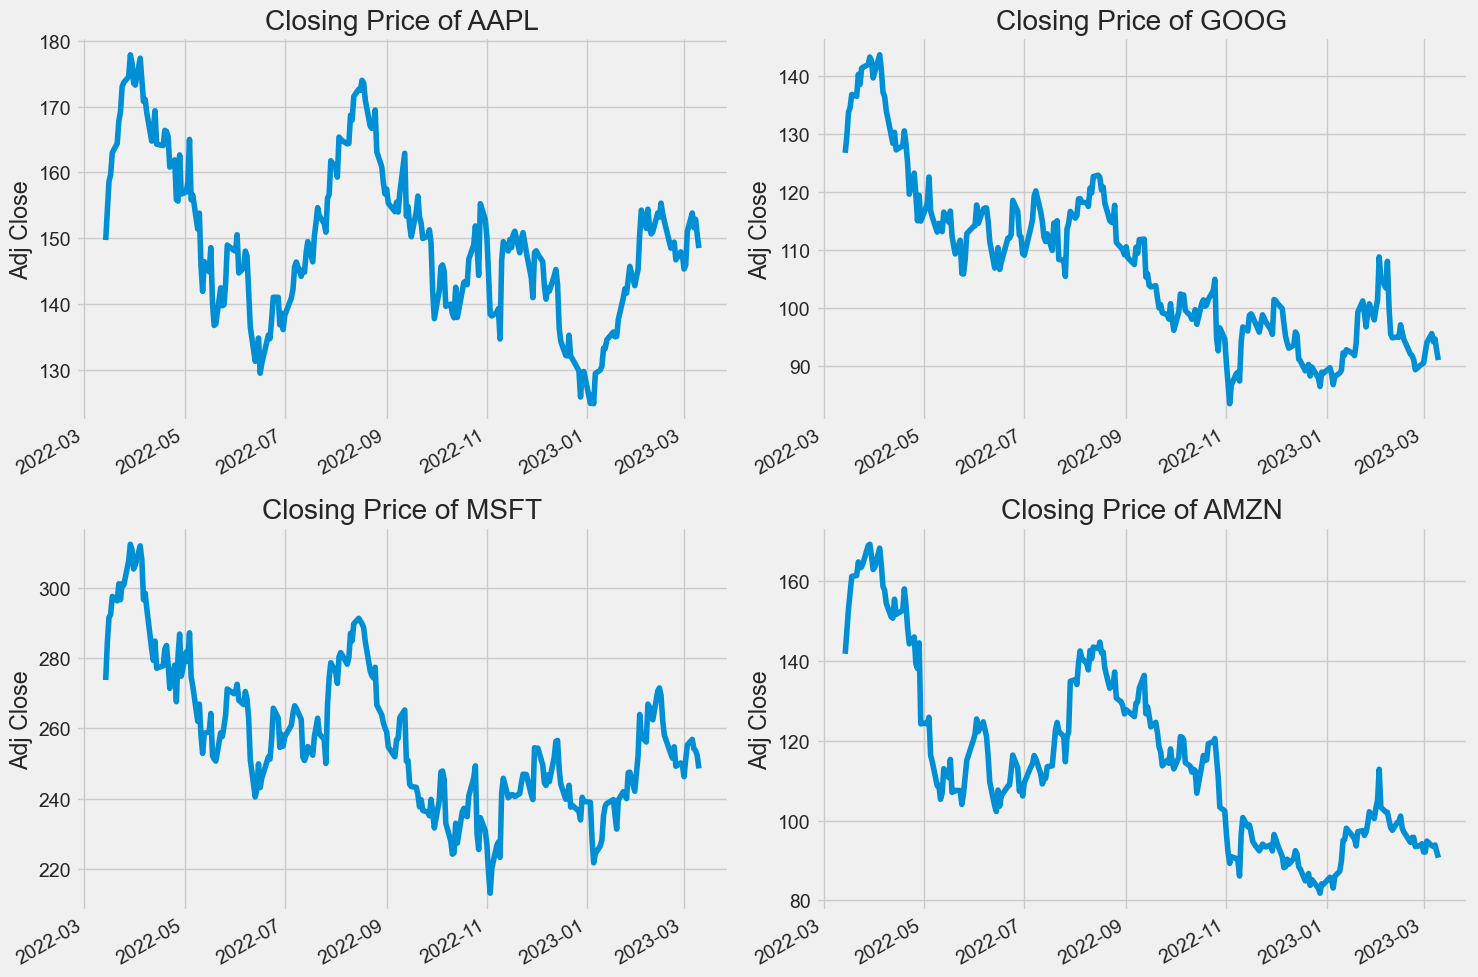

In [14]:
# 그래프의 크기를 지정하기
plt.figure(figsize=(15,10))
#그래프 간의 간격 조절
plt.subplots_adjust(top=1.25, bottom=1.2)

#모든 기업에 대해 그래프 그리기
for i , company in enumerate(company_list, 1):
    #2X2의 그래프에서 i번째 위치에 그래프를 그립니다
    plt.subplot(2, 2, i)
    
    #기업의 종가 데이터를 그래프로 나타내기
    company['Adj Close'].plot()
    
    #y축 라벨을 설정하기
    plt.ylabel('Adj Close')
    
    # x축 라벨은 생략하기
    plt.xlabel(None)
    
    # 그래프 제목을 설정하기
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
#그래프들이 서로 겹치지 않도록 자동으로 간격 조절하기
plt.tight_layout()

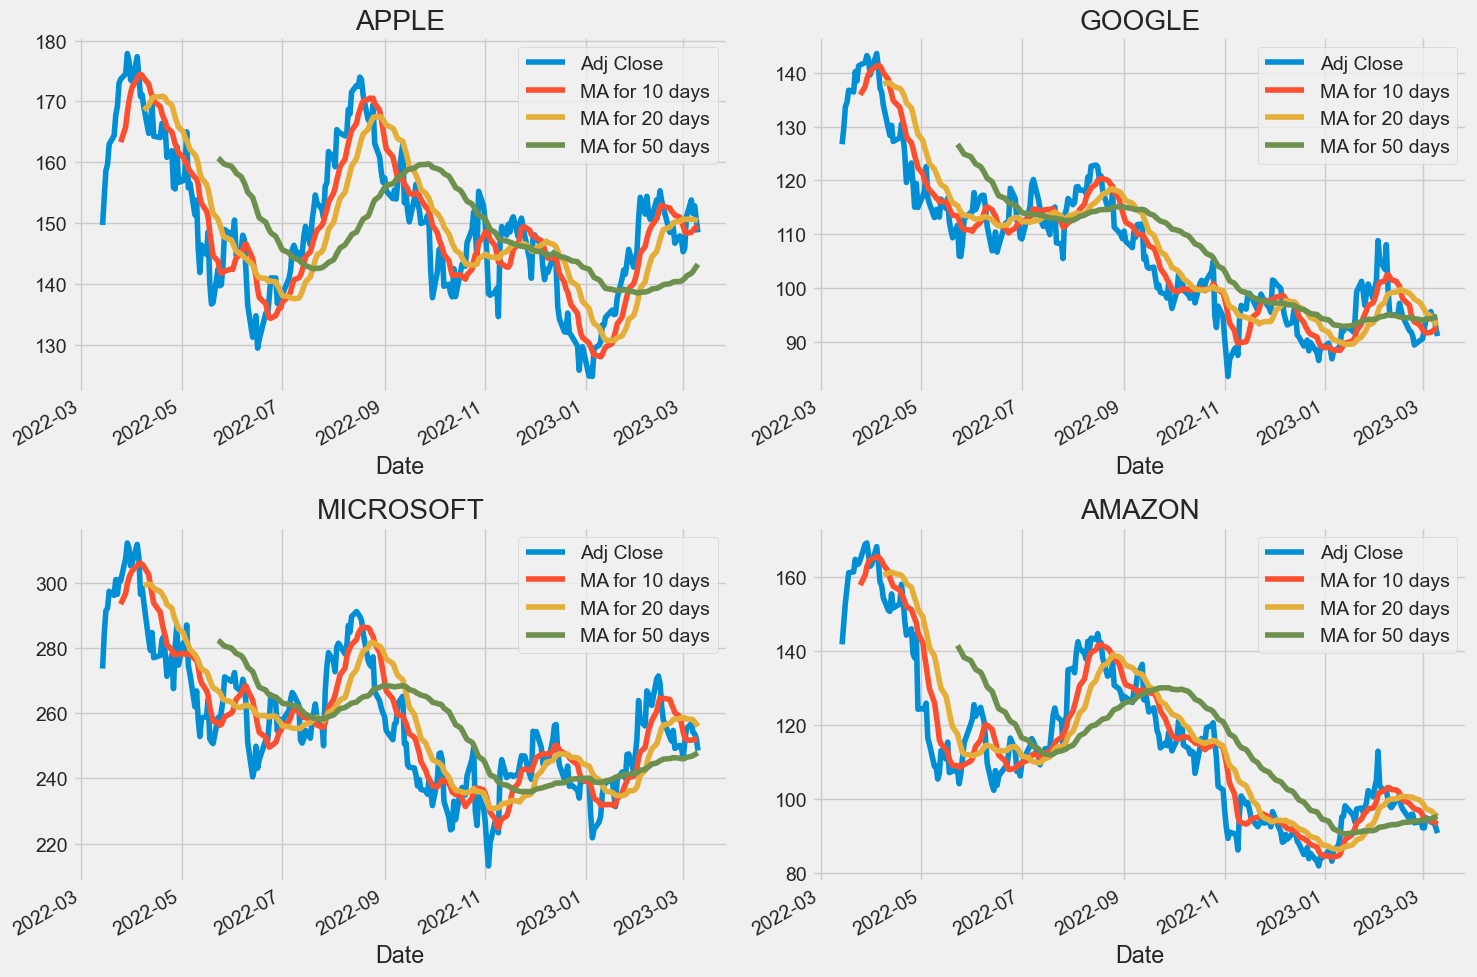

In [30]:
# 이동평균을 계산할 날짜 리스트를 정의
ma_day = [10, 20, 50]

# 모든 기업에 대해 이동평균을 계산하고, 이동편균 값을 컬럼으로 추가하기
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
# 그래프를 그리기 위해 그래프 크기 설정하기
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# APPLE 주식에 대한 그래프 그리기
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# GOOGLE 주식에 대한 그래프 그리기
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# MICROSOFT 주식에 대한 그래프 그리기
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# AMAZON 주식에 대한 그래프 그리기
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


# 서로 겹치지 않게 그래프 조정
fig.tight_layout()

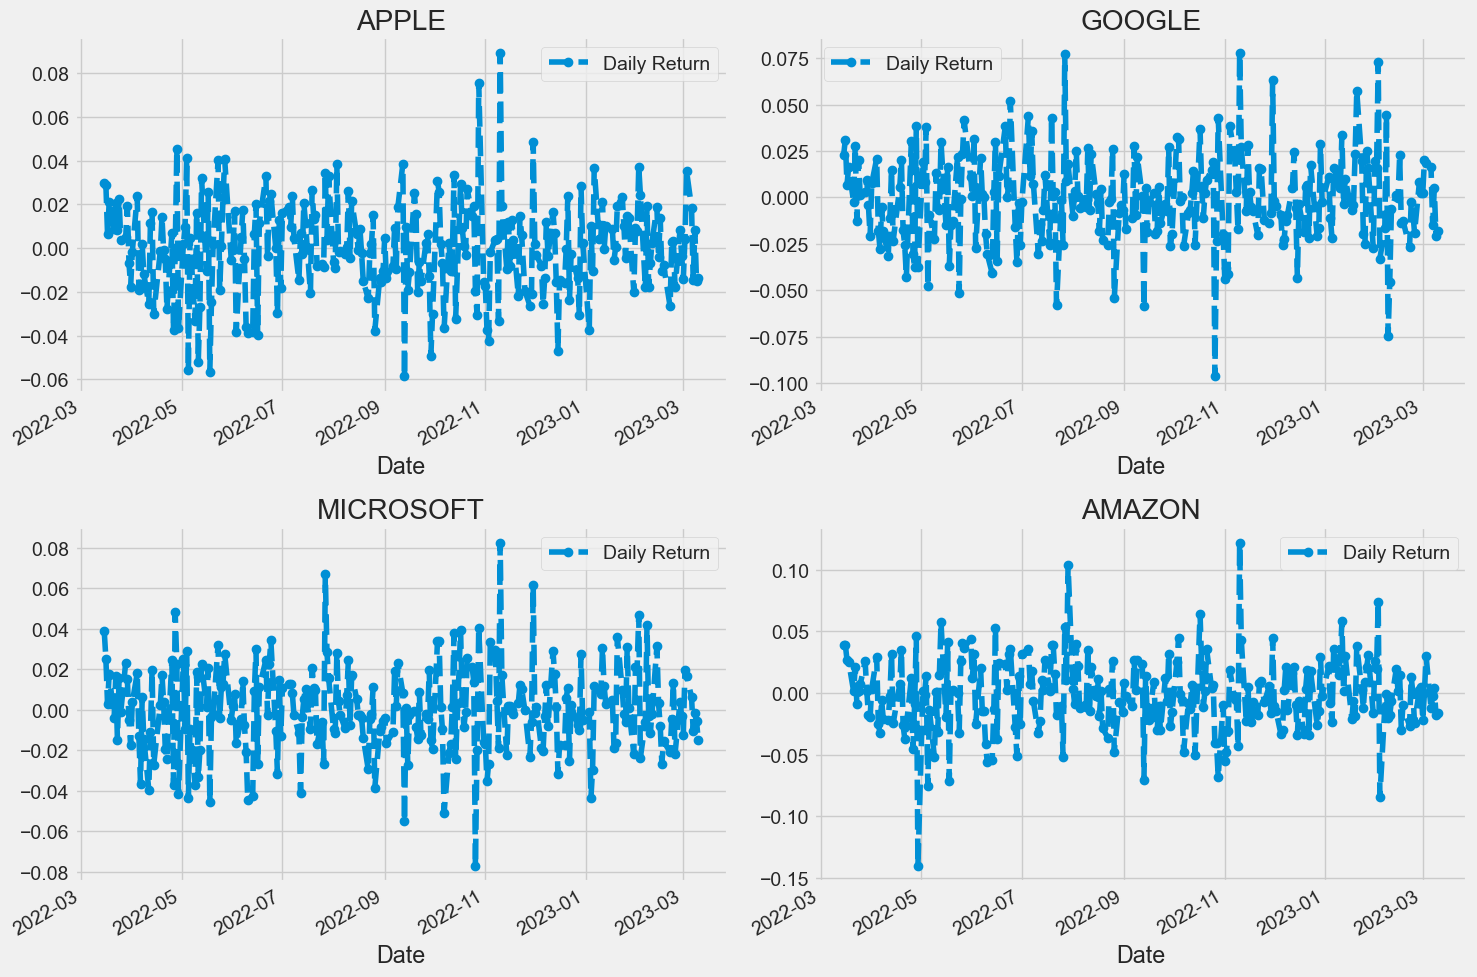

In [31]:
# 모든 기업에 대해 일별 주가 변동율을 계산하고, Daily Return 컬럼으로 추가하기
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
# 그래프를 그리기 위해 그래프크기 설정
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# APPLE 주식의 일별 주가 변동율
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

# GOOGLE 주식의 일별 주가 변동율
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

# MICROSOFT 주식의 일별 주가 변동율
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

# AMAZON 주식의 일별 주가 변동율
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

# 서로 겹치지 않게 그래프 조정
fig.tight_layout()

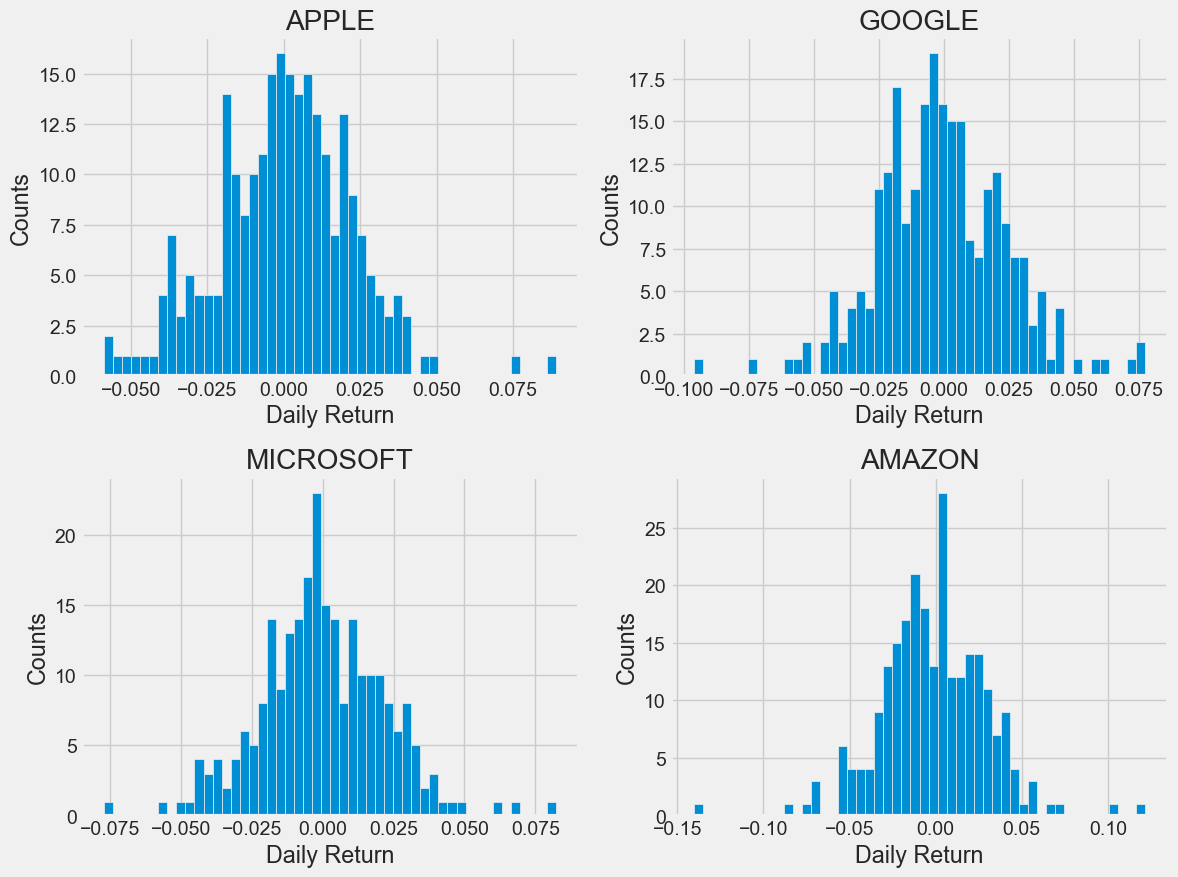

In [32]:
# 그래프의 크기를 지정하기
plt.figure(figsize=(12,9))

# 모든 기업에 대해 일별 주가 변동율의 히스토그램 그리기
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

# 그래프들이 서로 겹치지 않도록 간격 조절
plt.tight_layout()    

In [33]:
# tech_list에 저장된 기업들의 일별 수정 종가 데이터를 가져와서, 새로운 데이터프레임(closing_df)에 저장합니다.
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# closing_df 데이터프레임의 일별 수익률을 계산하여, tech_rets라는 새로운 데이터프레임에 저장합니다.
tech_rets = closing_df.pct_change()

# tech_rets의 첫 5개 행을 출력합니다.
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-14,NaN,NaN,NaN,NaN
2022-03-15,0.029677,0.038868,0.023035,0.038743
2022-03-16,0.029015,0.038934,0.031081,0.025214
2022-03-17,0.006454,0.027008,0.006807,0.002819
2022-03-18,0.020919,0.025512,0.016352,0.017648


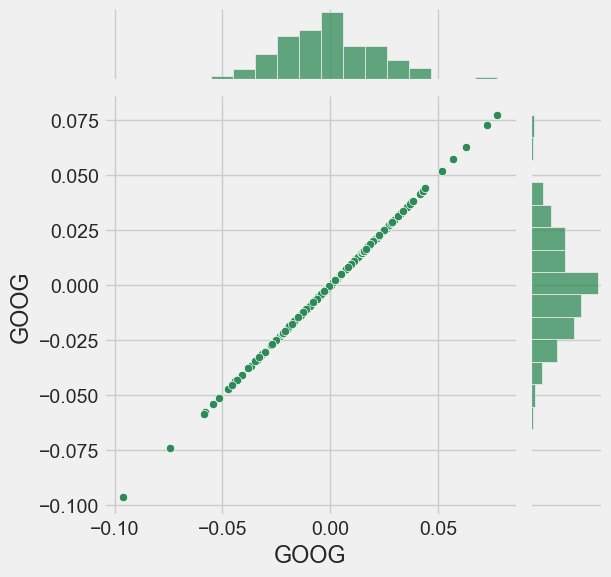

In [34]:
# seaborn 라이브러리를 사용하여, 구글(GOOG)의 일별 수익률 데이터를 산점도 그래프로 시각화합니다.
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

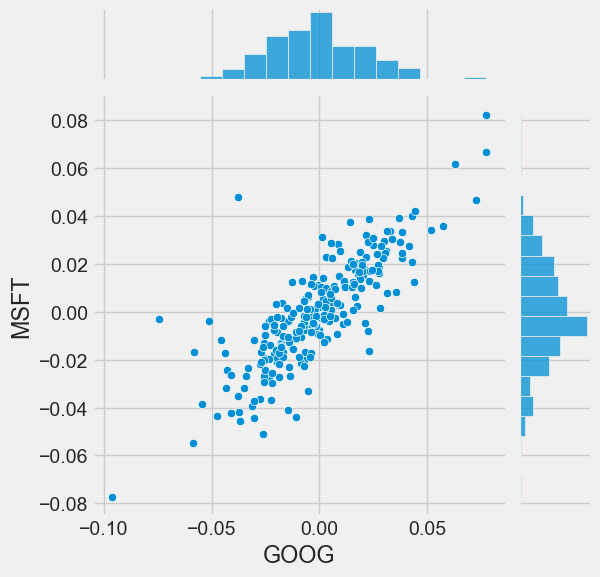

In [35]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

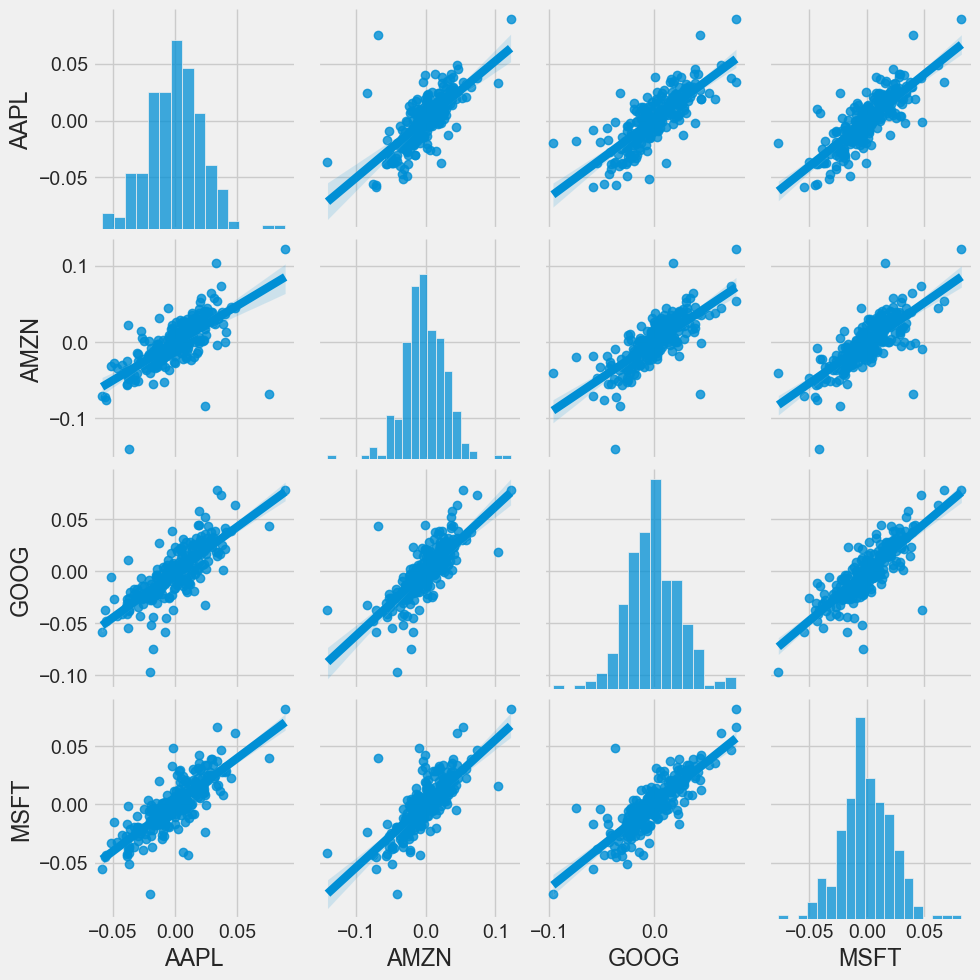

In [36]:
# seaborn 라이브러리를 사용하여, tech_rets 데이터프레임에 저장된 모든 기업들 간의 일별 수익률 비교를 위한 시각화를 자동으로 수행합니다.
# pairplot 함수를 호출하면 데이터프레임 내의 모든 수치형 변수 쌍에 대한 그래프를 그려줍니다.
# 각 그래프는 두 변수 간의 관계를 나타내며, 대각선에는 해당 변수의 분포를 보여주는 히스토그램이 그려집니다.
# kind='reg' 옵션을 사용하면 선형 회귀 직선이 함께 그려집니다.
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

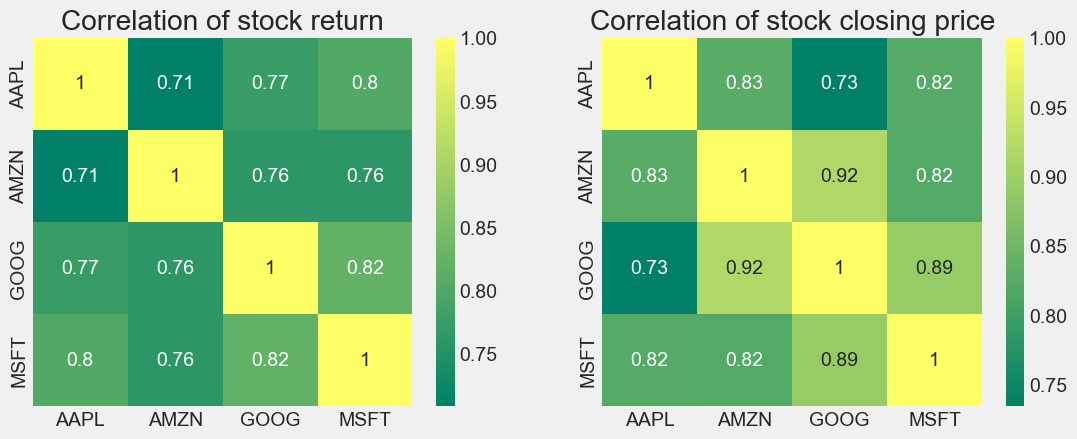

In [38]:
# seaborn 라이브러리를 사용하여, 각 기업들의 일별 수익률과 수정 종가 간의 상관 관계를 나타내는 히트맵을 그리는 코드입니다.

# subplot 함수를 사용하여 2x2 크기의 그래프를 만듭니다.
plt.figure(figsize=(12, 10))

# 첫 번째 그래프는 tech_rets DataFrame의 상관 관계를 나타내는 히트맵입니다.
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

# 두 번째 그래프는 closing_df DataFrame의 상관 관계를 나타내는 히트맵입니다.
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

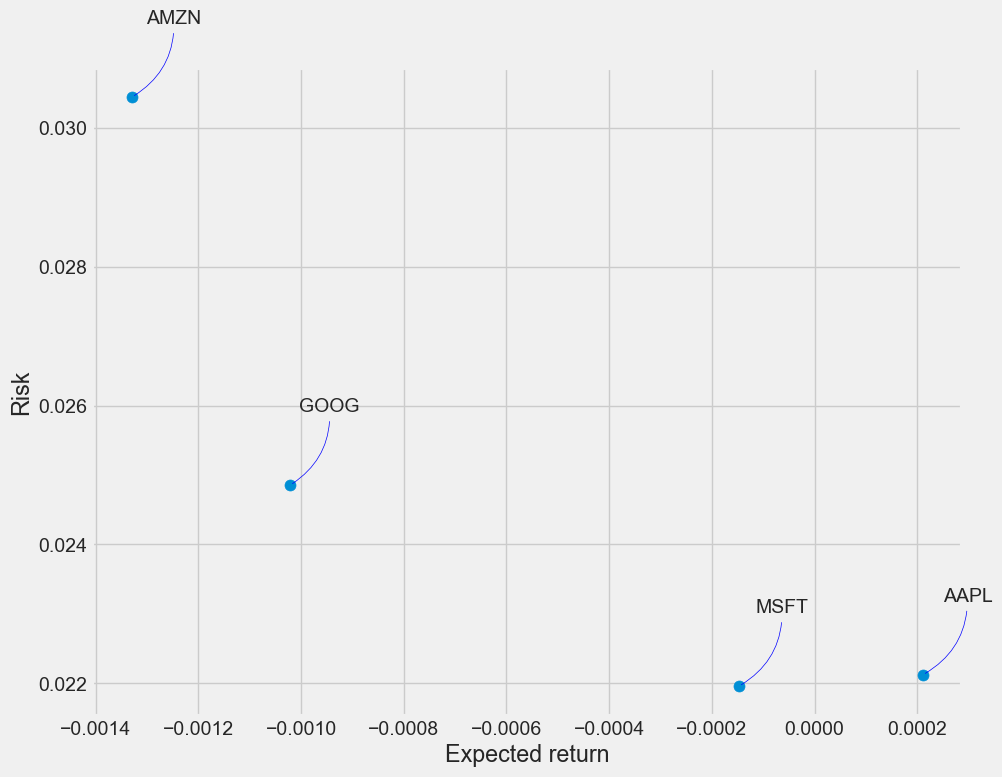

In [39]:
# numpy와 matplotlib 라이브러리를 사용하여, 각 기업들의 일별 수익률에 따른 위험과 예상 수익률을 나타내는 산점도 그래프를 그리는 코드입니다.

# tech_rets DataFrame에서 결측값을 제거한 후 rets 변수에 할당합니다.
rets = tech_rets.dropna()

# numpy의 pi 상수와 20을 곱하여 area 변수에 할당합니다.
area = np.pi * 20

# plt.scatter 함수를 사용하여 산점도 그래프를 그리는데,
# x축은 일별 수익률의 평균, y축은 일별 수익률의 표준편차를 나타내며, 점의 크기는 area 변수로 지정됩니다.
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# annotate 함수를 사용하여 각 점에 대한 기업 이름을 표시합니다.
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [40]:
# pandas_datareader 라이브러리를 사용하여, 2012년 1월 1일부터 현재까지의 AAPL(애플) 주식 데이터를 불러와서 DataFrame으로 표시하는 코드입니다.

# 먼저, pdr.get_data_yahoo 함수를 사용하여 애플의 주식 데이터를 불러오고,
# start와 end 인자를 사용하여 불러올 데이터의 기간을 설정합니다.
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

# 마지막으로, df 변수에 불러온 데이터를 할당합니다.
# df를 출력하여 데이터를 확인합니다.
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500191,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839726,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819359,394024400
...,...,...,...,...,...,...
2023-03-06,153.789993,156.300003,153.460007,153.830002,153.830002,87558000
2023-03-07,153.699997,154.029999,151.130005,151.600006,151.600006,56182000
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800


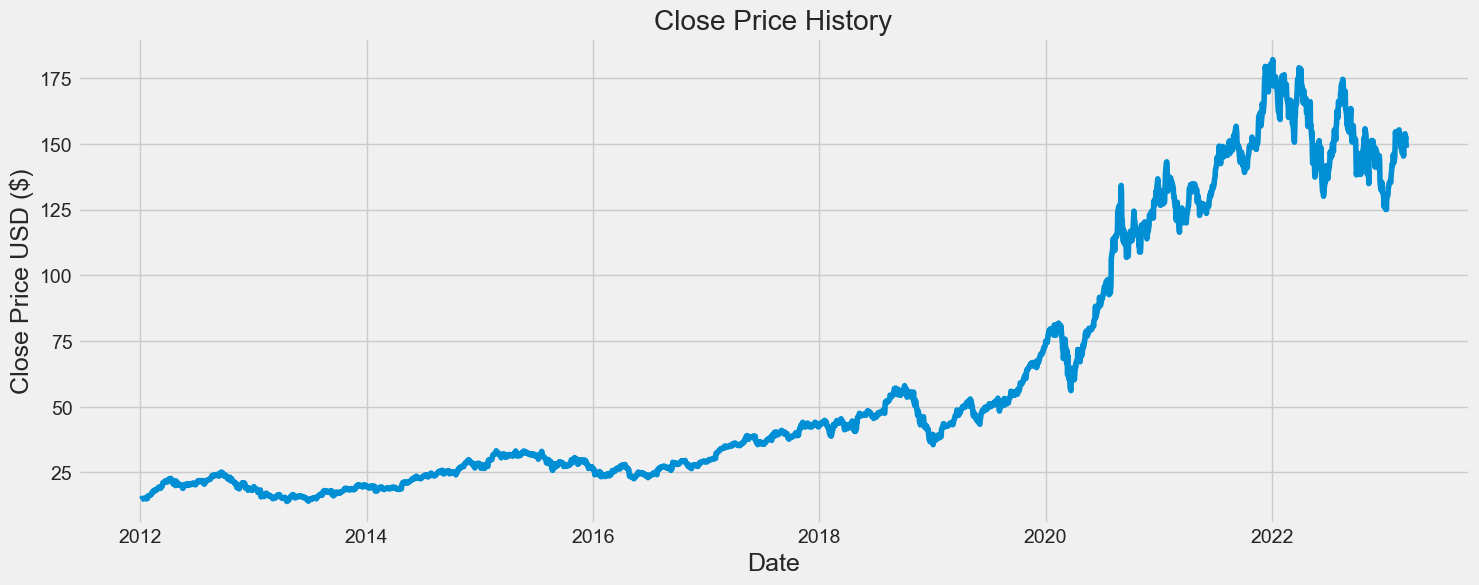

In [41]:
# matplotlib 라이브러리를 사용하여, 애플 주식의 종가(close price) 추이를 그래프로 나타내는 코드입니다.

# plt.figure 함수를 사용하여 그래프의 크기를 설정하고,
# plt.title 함수를 사용하여 그래프의 제목을 설정합니다.
plt.figure(figsize=(16,6))
plt.title('Close Price History')

# plt.plot 함수를 사용하여 애플 주식의 종가 데이터(df['Close'])를 그래프로 나타냅니다.
# x축에는 날짜(Date)를, y축에는 종가(Close Price USD ($))를 나타냅니다.
plt.plot(df['Close'])

# plt.xlabel, plt.ylabel 함수를 사용하여 x축과 y축의 레이블을 설정합니다.
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# plt.show 함수를 사용하여 그래프를 출력합니다.
plt.show()

In [42]:
# pandas 라이브러리를 사용하여, 애플 주식의 종가 데이터를 numpy 배열로 변환하고,
# 학습 데이터(training data)의 크기를 계산하는 코드입니다.

# df.filter 함수를 사용하여 'Close' 열(column)만을 포함한 새로운 데이터프레임(data)을 만듭니다.
data = df.filter(['Close'])

# data.values를 사용하여 데이터프레임을 numpy 배열(dataset)로 변환합니다.
dataset = data.values

# int(np.ceil( len(dataset) * .95 ))를 사용하여 학습 데이터(training data)의 크기를 계산합니다.
# 학습 데이터의 크기는 전체 데이터셋의 95%로 설정되며,
# np.ceil 함수를 사용하여 소수점 이하의 값을 올림(round up) 처리합니다.
training_data_len = int(np.ceil( len(dataset) * .95 ))

# training_data_len을 출력하여 학습 데이터의 크기를 확인합니다.
training_data_len

2675

In [43]:
# scikit-learn 라이브러리를 사용하여, numpy 배열로 변환된 애플 주식의 종가 데이터를 스케일링하는 코드입니다.

# from sklearn.preprocessing import MinMaxScaler를 사용하여 MinMaxScaler 클래스를 임포트합니다.
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체(scaler)를 생성합니다.
scaler = MinMaxScaler(feature_range=(0,1))

# scaler.fit_transform 함수를 사용하여 scaled_data에 스케일링된 데이터를 저장합니다.
scaled_data = scaler.fit_transform(dataset)

# scaled_data를 출력하여 스케일링된 데이터를 확인합니다.
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.82661212],
       [0.81304575],
       [0.80060992]])

In [44]:
# 스케일링된 애플 주식 종가 데이터를 학습 데이터셋으로 변환하는 코드입니다.

# train_data에 95% 학습 데이터(training data)를 저장합니다.
train_data = scaled_data[0:int(training_data_len), :]

# train_data를 60일씩 슬라이싱하여 x_train과 y_train 데이터셋으로 분할합니다.
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# x_train과 y_train을 numpy 배열로 변환합니다.
x_train, y_train = np.array(x_train), np.array(y_train)

# x_train의 크기를 (x_train.shape[0], x_train.shape[1], 1)로 변환하여 3차원으로 만들어 줍니다.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train의 크기를 출력하여 데이터셋의 크기를 확인합니다.
x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

(2615, 60, 1)

In [56]:
# pip install tensorflow 
# pip install keras

# LSTM(Long Short-Term Memory) 모델을 구성하고 학습시키는 코드입니다.

# keras.models 패키지에서 Sequential 클래스와 layers 패키지에서 Dense와 LSTM 클래스를 import합니다.
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential() 함수를 사용하여 모델 객체 model을 생성합니다.
model = Sequential()

# model.add() 함수를 사용하여 LSTM 층을 추가합니다.
# 첫 번째 LSTM 층은 128개의 뉴런(neuron)을 가지며, return_sequences=True로 설정하여 다음 층에서도 시퀀스(Sequence) 출력을 유지하도록 합니다.
# input_shape은 x_train 데이터셋의 차원을 지정합니다.
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# 두 번째 LSTM 층은 64개의 뉴런을 가지며, return_sequences=False로 설정하여 마지막 층에서 시퀀스 출력이 필요하지 않도록 합니다.
model.add(LSTM(64, return_sequences=False))

# Dense() 함수를 사용하여 완전 연결층(fully connected layer)을 추가합니다.
model.add(Dense(25))
model.add(Dense(1))

# model.compile() 함수를 사용하여 모델을 컴파일합니다. optimizer로 adam을, loss로 mean squared error를 설정합니다.
model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit() 함수를 사용하여 모델을 학습합니다. x_train과 y_train 데이터셋을 입력으로 하여 batch size를 1, epochs를 1로 설정합니다.
model.fit(x_train, y_train, batch_size=1, epochs=1)

2615/2615 [==============================] - 30s 11ms/step - loss: 0.0012


In [57]:
# 테스트 데이터 셋 만들기
# 새로운 배열을 생성하고 스케일링된 값을 인덱스 1543에서 2002까지 저장
test_data = scaled_data[training_data_len - 60: , :]
# 데이터 셋 x_test와 y_test 생성
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    # x_test 배열에 60일치의 데이터를 넣음
    x_test.append(test_data[i-60:i, 0])

# 데이터를 numpy 배열로 변환
x_test = np.array(x_test)

# 데이터 형태 재조정
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# 모델로 예측한 가격 가져오기
predictions = model.predict(x_test)
# 스케일링 된 값을 되돌리기
predictions = scaler.inverse_transform(predictions)

# 평균제곱근오차 (RMSE) 계산하기
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 12ms/step


13.089336626486665

C:\Users\ITSC\AppData\Local\Temp\ipykernel_3800\1374307914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


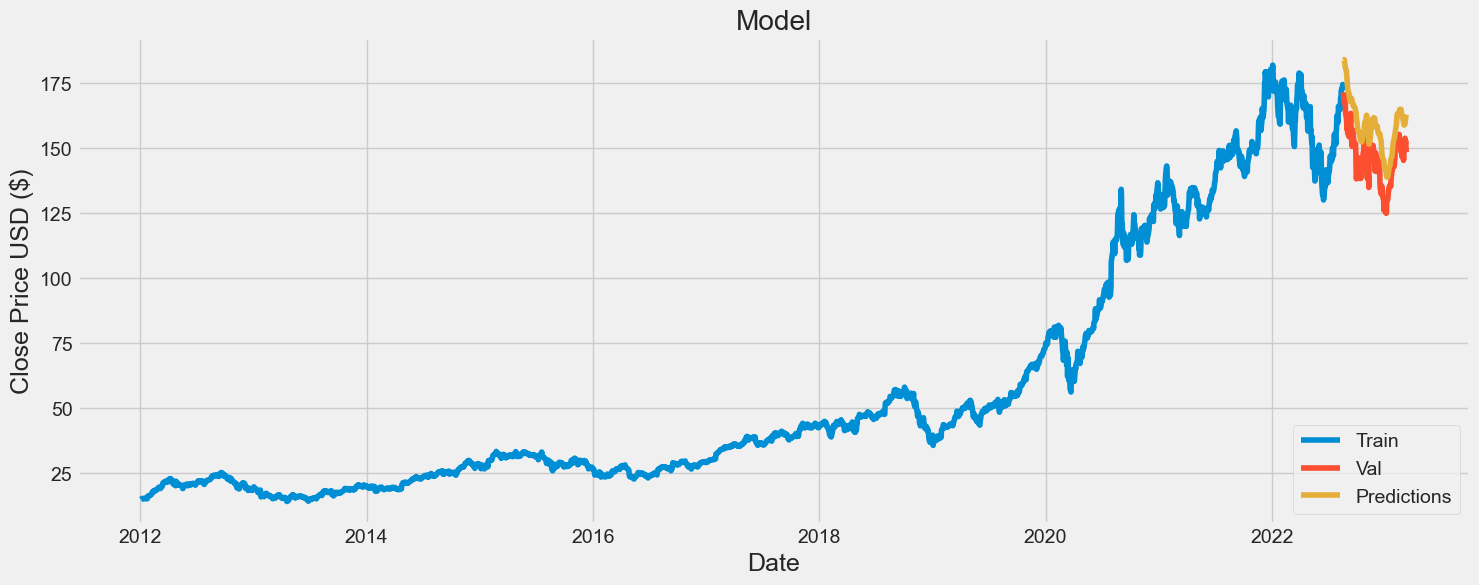

In [86]:
# 예측한 값을 시각화해서 확인해보자
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# 데이터 시각화
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [87]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-19,171.520004,183.912231
2022-08-22,167.570007,184.096329
2022-08-23,167.229996,183.303238
2022-08-24,167.529999,182.192978
2022-08-25,170.029999,181.173584
...,...,...
2023-03-06,153.830002,159.314865
2023-03-07,151.600006,160.560638
2023-03-08,152.869995,161.584198
